# DEFINITIONS

In [1]:
import numpy as np
import pandas as pd
from itertools import combinations
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from tqdm.notebook import tqdm as progressbar

In [2]:
def normalize_d(data):
    return (data - data.min()) / (data.max() - data.min())

def denormalize_d(data, base):
    return ( data * (base.max() - base.min()) ) + base.min()
    
def calculate_error(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestRegressor(random_state=42, n_estimators=100)
    clf.fit(x_train,y_train)
    y_generated = clf.predict(x_test)
    return mean_absolute_percentage_error(y_generated, y_test)

def train(X, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    clf = RandomForestRegressor(random_state=42, n_estimators=1000)
    clf.fit(x_train,y_train)
    return clf

# LOAD DATASETS

In [3]:
my_semantic = [
    'stature',
    'waist-girth',
    'hip-girth',
    'thigh-girth',
    'calf-girth',
    'neck-girth',
    'bust-girth',
    'wrist-girth',
    'upper-arm-girth',
    'biacromial-length',
    'neck-to-waist-length',
    'waist-height',
    'hip-height'
]
life_semantic = [
    'height',
    'waist_gth',
    'hip_gth',
    'thigh_gth_r_hz',# 'thigh_gth_l_hz'
    'calf_gth_r', # calf_gth_l
    'mid_neck_gth',
    'bust_chest_gth',
    'wrist_gth',
    'up_arm_gth_r',
    'cr_shoulder',
    'neck_waist_c_back',
    'waist_ht',
    'hip_ht'
]
ansur_semantic = [
    'stature',
    'waistcircumference',
    'buttockcircumference',
    'thighcircumference',
    'calfcircumference',
    'neckcircumference',
    'chestcircumference',
    'wristcircumference',
    'bicepscircumferenceflexed',
    'interscyeii',
    'waistbacklength',
    'waistheightomphalion',
    'trochanterionheight',
]


In [4]:
my_male = np.load("bodies-male-measures.npy")
my_female = np.load("bodies-female-measures.npy")

my_male = pd.DataFrame(my_male, columns=my_semantic)
my_female = pd.DataFrame(my_female, columns=my_semantic)

In [5]:
ansur_male = pd.read_csv("datasets/ansur_2_male.csv",encoding_errors='ignore')
ansur_male_age = ansur_male['Age']
ansur_male = ansur_male[ansur_semantic]/10
ansur_male.columns = my_semantic

ansur_female = pd.read_csv("datasets/ansur_2_female.csv",encoding_errors='ignore')
ansur_female_age = ansur_female['Age']
ansur_female = ansur_female[ansur_semantic]/10
ansur_female.columns = my_semantic

ansur_male_normalized = normalize_d(ansur_male)
ansur_male_age_normalized = normalize_d(ansur_male_age)

ansur_female_normalized = normalize_d(ansur_female)
ansur_female_age_normalized = normalize_d(ansur_female_age)

In [6]:
life = pd.read_csv("datasets/life.csv",encoding_errors='ignore').dropna()

life_male = life[life['Gender'] == 'male']
life_male.columns = life_male.columns.str.lower()
life_male_age = life_male['age']
life_male = life_male[life_semantic]
life_male.columns = my_semantic

life_female = life[life['Gender'] == 'female']
life_female.columns = life_female.columns.str.lower()
life_female_age = life_female['age']
life_female = life_female[life_semantic]
life_female.columns = my_semantic

life_male_normalized = normalize_d(life_male)
life_male_age_normalized = normalize_d(life_male_age)

life_female_normalized = normalize_d(life_female)
life_female_age_normalized = normalize_d(life_female_age)

In [7]:
ansur_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,175.621460,94.057741,101.951886,62.514233,39.226066,39.764895,105.870554,17.591671,35.813572,45.016316,47.761244,105.648530,90.093067
std,6.855079,11.170587,7.668107,5.845217,2.970884,2.577676,8.743527,0.895506,3.461809,3.048854,2.772829,5.215467,4.917166
min,149.100000,64.800000,73.700000,41.200000,26.600000,31.100000,77.400000,14.100000,24.600000,34.500000,38.300000,87.600000,73.100000
25%,171.000000,85.700000,96.700000,58.600000,37.200000,37.925000,99.600000,17.000000,33.500000,43.000000,45.925000,102.000000,86.700000
50%,175.500000,93.700000,101.700000,62.400000,39.200000,39.500000,105.600000,17.600000,35.700000,45.000000,47.700000,105.500000,89.900000
75%,180.200000,101.600000,106.800000,66.200000,41.200000,41.375000,111.700000,18.200000,38.000000,47.100000,49.500000,109.000000,93.200000
max,199.300000,137.900000,130.500000,84.300000,52.300000,51.400000,146.900000,21.600000,49.000000,57.700000,59.800000,124.500000,109.500000


In [8]:
life_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,176.088858,100.668937,105.084021,55.632190,38.678485,42.224841,107.880496,18.217338,31.467081,50.258372,43.756663,111.097501,87.890666
std,7.487432,12.257658,7.610317,4.655902,3.029959,3.573047,9.642352,1.151149,2.814044,3.386522,2.308203,5.383601,5.833081
min,99.350000,68.600000,87.400000,37.700000,28.200000,33.100000,72.150000,14.350000,22.800000,32.300000,26.950000,61.550000,69.500000
25%,171.300000,92.100000,100.100000,52.600000,36.600000,39.700000,101.100000,17.400000,29.600000,48.000000,42.200000,107.500000,83.800000
50%,176.100000,100.000000,103.900000,55.400000,38.400000,41.800000,107.100000,18.150000,31.200000,50.100000,43.700000,111.000000,87.700000
75%,181.100000,108.500000,108.800000,58.300000,40.500000,44.400000,113.900000,19.000000,32.900000,52.300000,45.300000,114.600000,91.800000
max,206.500000,143.500000,157.700000,82.700000,51.900000,59.100000,155.400000,25.000000,48.900000,71.366667,53.000000,135.900000,115.500000


In [9]:
male_collection = pd.concat([life_male,ansur_male], axis=0)
female_collection = pd.concat([life_female,ansur_female], axis=0)
male_collection_age = pd.concat([life_male_age, ansur_male_age], axis=0)
female_collection_age = pd.concat([life_female_age, ansur_female_age], axis=0)

male_collection_normalized = normalize_d(male_collection)
female_collection_normalized = normalize_d(female_collection)

male_collection_age_normalized = normalize_d(male_collection_age)
female_collection_age_normalized = normalize_d(female_collection_age)

<AxesSubplot:ylabel='Frequency'>

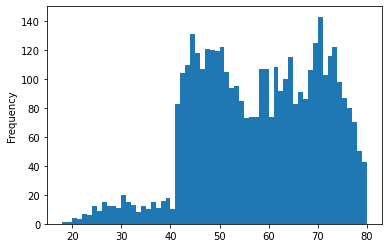

In [10]:
life_male_age.plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

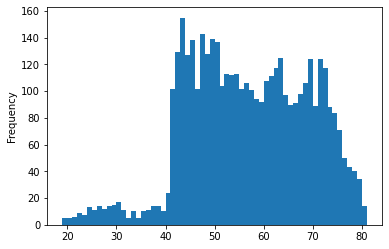

In [11]:
life_female_age.plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

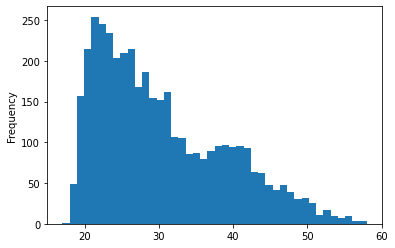

In [12]:
ansur_male_age.plot(kind='hist', bins=42)

<AxesSubplot:ylabel='Frequency'>

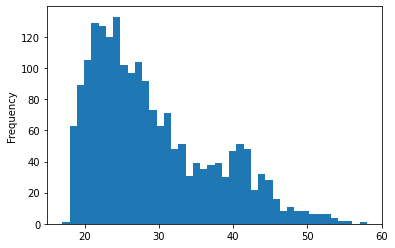

In [13]:
ansur_female_age.plot(kind='hist', bins=42)

<AxesSubplot:ylabel='Frequency'>

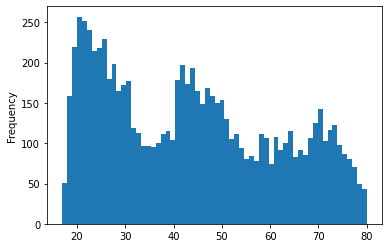

In [14]:
pd.concat([life_male_age, ansur_male_age], axis=0).plot(kind='hist', bins=62)

<AxesSubplot:ylabel='Frequency'>

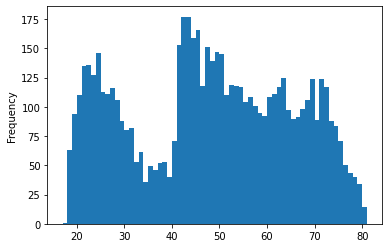

In [15]:
pd.concat([life_female_age, ansur_female_age], axis=0).plot(kind='hist', bins=64)

In [16]:
life_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,176.088858,100.668937,105.084021,55.632190,38.678485,42.224841,107.880496,18.217338,31.467081,50.258372,43.756663,111.097501,87.890666
std,7.487432,12.257658,7.610317,4.655902,3.029959,3.573047,9.642352,1.151149,2.814044,3.386522,2.308203,5.383601,5.833081
min,99.350000,68.600000,87.400000,37.700000,28.200000,33.100000,72.150000,14.350000,22.800000,32.300000,26.950000,61.550000,69.500000
25%,171.300000,92.100000,100.100000,52.600000,36.600000,39.700000,101.100000,17.400000,29.600000,48.000000,42.200000,107.500000,83.800000
50%,176.100000,100.000000,103.900000,55.400000,38.400000,41.800000,107.100000,18.150000,31.200000,50.100000,43.700000,111.000000,87.700000
75%,181.100000,108.500000,108.800000,58.300000,40.500000,44.400000,113.900000,19.000000,32.900000,52.300000,45.300000,114.600000,91.800000
max,206.500000,143.500000,157.700000,82.700000,51.900000,59.100000,155.400000,25.000000,48.900000,71.366667,53.000000,135.900000,115.500000


In [17]:
ansur_male.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000,4082.000000
mean,175.621460,94.057741,101.951886,62.514233,39.226066,39.764895,105.870554,17.591671,35.813572,45.016316,47.761244,105.648530,90.093067
std,6.855079,11.170587,7.668107,5.845217,2.970884,2.577676,8.743527,0.895506,3.461809,3.048854,2.772829,5.215467,4.917166
min,149.100000,64.800000,73.700000,41.200000,26.600000,31.100000,77.400000,14.100000,24.600000,34.500000,38.300000,87.600000,73.100000
25%,171.000000,85.700000,96.700000,58.600000,37.200000,37.925000,99.600000,17.000000,33.500000,43.000000,45.925000,102.000000,86.700000
50%,175.500000,93.700000,101.700000,62.400000,39.200000,39.500000,105.600000,17.600000,35.700000,45.000000,47.700000,105.500000,89.900000
75%,180.200000,101.600000,106.800000,66.200000,41.200000,41.375000,111.700000,18.200000,38.000000,47.100000,49.500000,109.000000,93.200000
max,199.300000,137.900000,130.500000,84.300000,52.300000,51.400000,146.900000,21.600000,49.000000,57.700000,59.800000,124.500000,109.500000


In [18]:
life_female.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000,4300.000000
mean,164.549745,90.445974,107.663437,57.346449,37.507700,35.874316,101.038740,16.382374,29.616314,46.334045,40.717312,102.532019,81.732263
std,6.880675,13.370739,10.024415,5.750482,3.420016,3.235896,11.007442,1.246011,3.221412,3.693511,2.369814,5.153316,5.575040
min,141.600000,59.700000,83.100000,38.500000,27.700000,28.000000,74.800000,12.800000,20.300000,36.600000,32.300000,84.750000,63.400000
25%,159.600000,80.100000,100.900000,53.500000,35.200000,33.500000,93.000000,15.500000,27.400000,43.800000,39.100000,99.000000,77.800000
50%,164.200000,89.700000,106.000000,56.600000,37.100000,35.400000,99.900000,16.200000,29.100000,46.000000,40.700000,102.300000,81.400000
75%,169.100000,99.225000,112.925000,60.500000,39.300000,37.900000,108.000000,17.100000,31.300000,48.400000,42.200000,106.100000,85.700000
max,188.400000,143.600000,183.300000,108.000000,61.900000,51.900000,148.200000,25.400000,45.000000,102.000000,51.300000,122.800000,104.200000


In [19]:
ansur_female.describe()

,stature,waist-girth,hip-girth,thigh-girth,calf-girth,neck-girth,bust-girth,wrist-girth,upper-arm-girth,biacromial-length,neck-to-waist-length,waist-height,hip-height
count,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000,1986.000000
mean,162.847331,86.090534,102.124773,61.614854,37.325780,32.979557,94.685801,15.479255,30.557855,39.570896,42.540282,98.014904,84.535096
std,6.419951,9.993177,7.589471,5.581030,2.851518,1.922114,8.269911,0.782770,3.075703,2.570713,2.638895,5.002271,4.467627
min,140.900000,61.100000,79.800000,44.800000,28.200000,27.500000,69.500000,12.400000,21.600000,30.600000,34.500000,80.500000,66.000000
25%,158.625000,79.000000,96.900000,57.900000,35.400000,31.600000,88.900000,15.000000,28.500000,37.900000,40.700000,94.700000,81.600000
50%,162.600000,85.200000,101.850000,61.300000,37.200000,32.800000,94.000000,15.400000,30.400000,39.600000,42.450000,97.750000,84.400000
75%,167.200000,92.500000,106.900000,65.100000,39.175000,34.200000,99.900000,16.000000,32.400000,41.200000,44.200000,101.300000,87.400000
max,182.900000,133.400000,134.100000,87.000000,48.200000,42.400000,126.600000,18.300000,43.500000,49.300000,53.200000,114.200000,101.800000


# REGRESSOR TEST

In [20]:
print(1 - calculate_error(life_male_normalized, life_male_age_normalized))
print(1 - calculate_error(life_female_normalized, life_female_age_normalized))
print(1 - calculate_error(ansur_male_normalized, ansur_male_age_normalized))
print(1 - calculate_error(ansur_female_normalized, ansur_female_age_normalized))
print(1 - calculate_error(male_collection_normalized, male_collection_age_normalized))
print(1 - calculate_error(female_collection_normalized, female_collection_age_normalized))

0.8218560887494342
0.8014503174350444
0.5421817908817115
0.4743693054208351
0.673687934559019
0.6967080252485642


In [21]:
X = life_male_normalized
y = life_male_age_normalized
x_train, x_test, y_train, y_test = train_test_split(ansur_male_normalized, y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(random_state=42, n_estimators=100)
clf.fit(x_train,y_train)
print("Importancia:")
for score, name in sorted(zip(clf.feature_importances_, my_semantic)):
    print('{:06.2%}'.format(score), name)

Importancia:
06.77% wrist-girth
06.80% stature
07.04% hip-girth
07.25% thigh-girth
07.44% neck-girth
07.58% waist-height
07.68% upper-arm-girth
07.80% waist-girth
07.83% calf-girth
07.86% bust-girth
08.13% neck-to-waist-length
08.78% hip-height
09.03% biacromial-length


In [22]:
X = ansur_male_normalized
y = ansur_male_age_normalized
x_train, x_test, y_train, y_test = train_test_split(ansur_male_normalized, y, test_size=0.33, random_state=42)
clf = RandomForestRegressor(random_state=42, n_estimators=100)
clf.fit(x_train,y_train)
print("Importancia:")
for score, name in sorted(zip(clf.feature_importances_, my_semantic)):
    print('{:06.2%}'.format(score), name)

Importancia:
03.92% stature
04.31% waist-height
04.42% hip-height
04.77% wrist-girth
05.15% biacromial-length
05.41% neck-to-waist-length
05.64% calf-girth
05.72% hip-girth
05.83% neck-girth
06.37% bust-girth
06.51% upper-arm-girth
14.98% thigh-girth
26.96% waist-girth


# AGE INTERVAL ANALISYS

In [23]:
def interval_tests(data_normalized, age, nage, interval):
    age_interval = age.between(*interval)
    data_normalized = data_normalized[age_interval]
    nage = nage[age_interval]
    if data_normalized.size == 0:
        return np.nan
    error = calculate_error(data_normalized, nage)
    return error

In [24]:
datasets_array = [
    ('life_male', life_male_normalized, life_male_age, life_male_age_normalized),
    ('life_female', life_female_normalized, life_female_age, life_female_age_normalized),
    ('ansur_male', ansur_male_normalized, ansur_male_age, ansur_male_age_normalized),
    ('ansur_female', ansur_female_normalized, ansur_female_age, ansur_female_age_normalized),
    ('collection_male', male_collection_normalized, male_collection_age, male_collection_age_normalized),
    ('collection_female', female_collection_normalized, female_collection_age, female_collection_age_normalized),
]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

<AxesSubplot:>

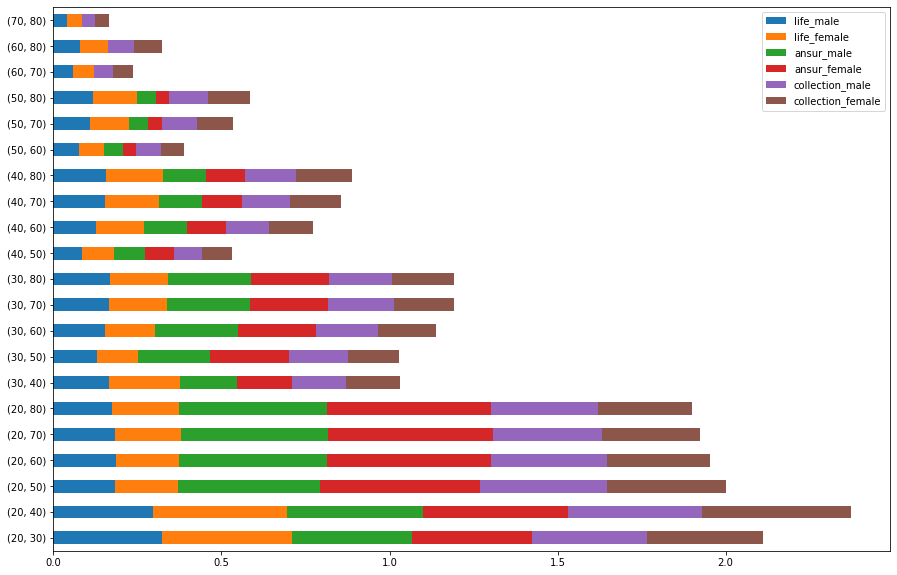

In [25]:
data_extracted = {}
comb = list(combinations(range(20,81,10), 2))
for name, data, nage, age in progressbar(datasets_array):
    data_extracted[name] = []
    for interval in progressbar(comb, leave=False):
        test = interval_tests(data, nage, age, interval)
        data_extracted[name].append(test)
extracted = pd.DataFrame(data_extracted, index=comb)
extracted.plot(kind='barh', figsize=(15,10), stacked=True)

<AxesSubplot:>

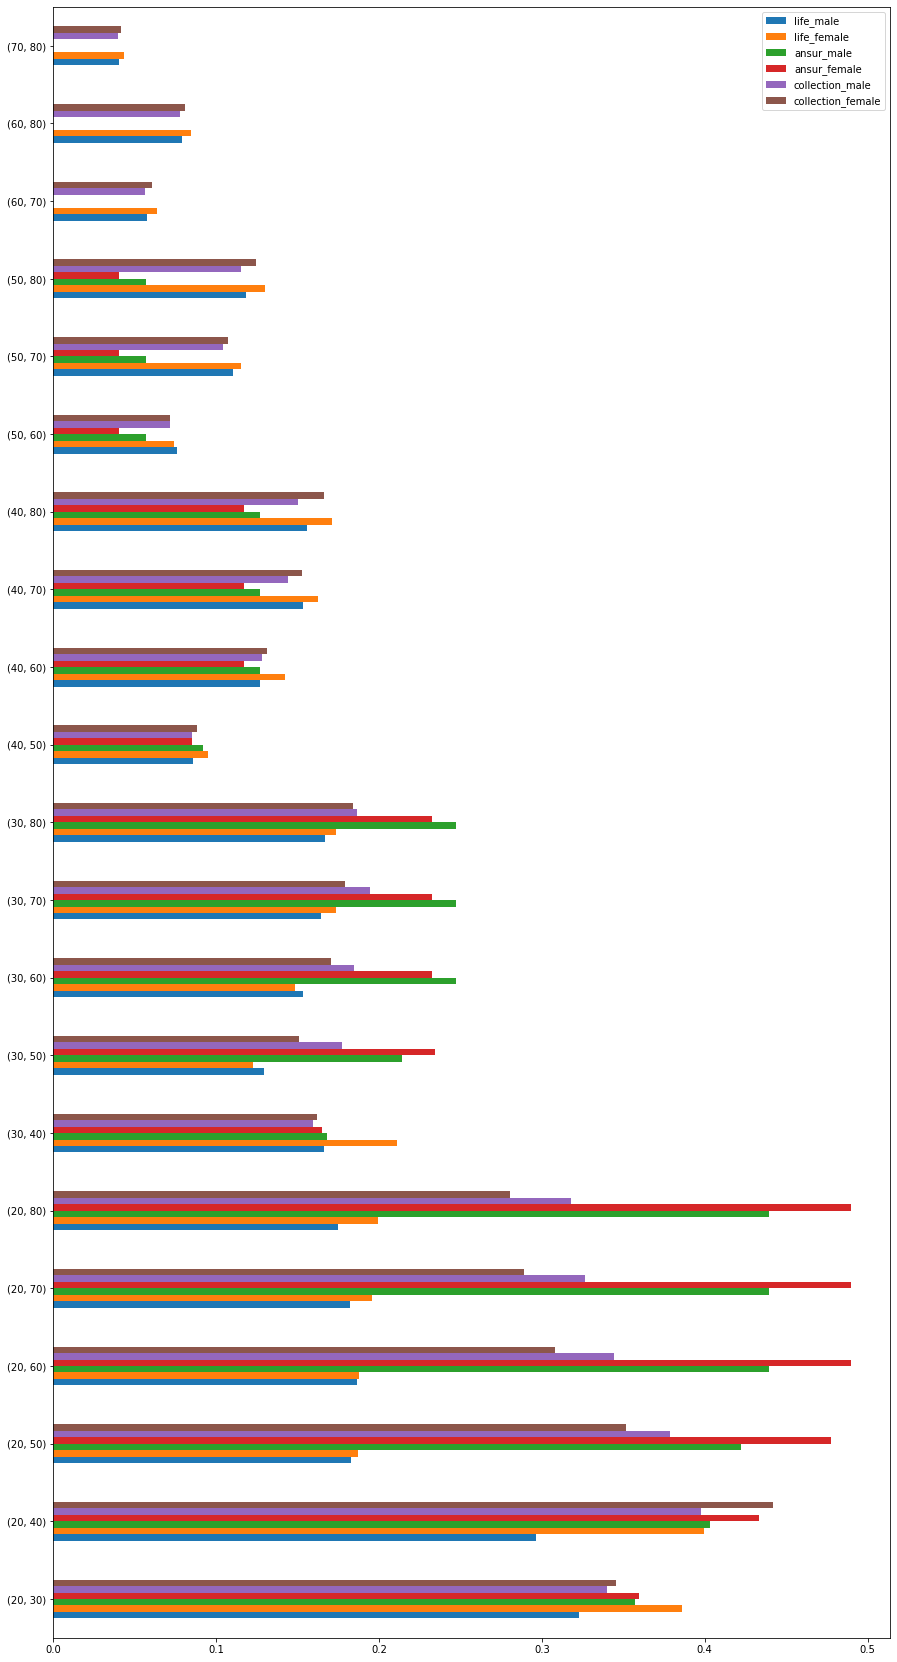

In [26]:
extracted.plot(kind='barh', figsize=(15,30))

<AxesSubplot:>

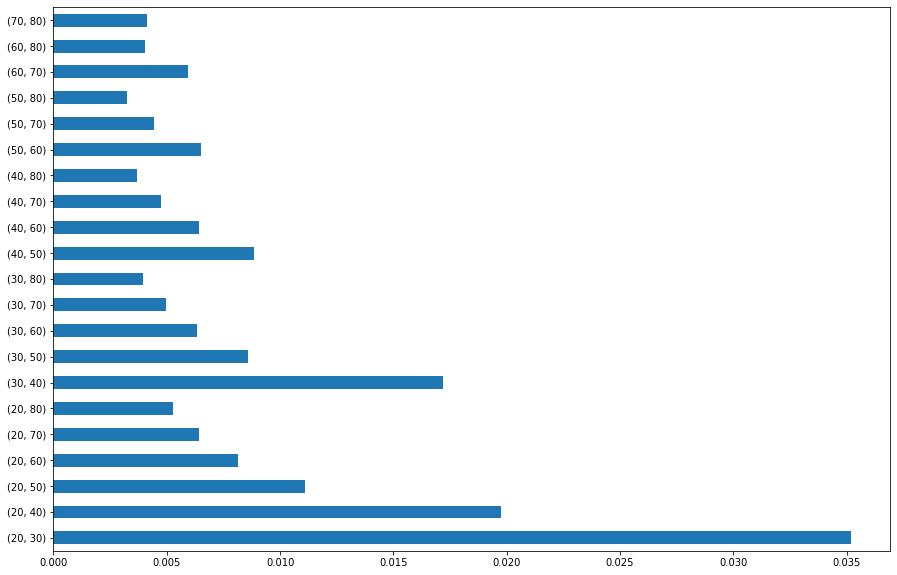

In [27]:
mean_of_errors = extracted.mean(axis=1)
interval_sizes = np.diff(np.array(list(extracted.index)), axis=1).flatten()
factor = mean_of_errors/interval_sizes
factor.plot(kind='barh', figsize=(15,10))

In [28]:
minimal = factor.argmin()
print(factor.keys()[minimal], factor[minimal])

(50, 80) 0.003250289577822522


In [29]:
factor_copy = factor.copy()
minimal_id = factor.keys()[minimal]
factor_copy = factor_copy.drop(index=minimal_id)
minimal = factor_copy.argmin()
print(factor_copy.keys()[minimal], factor_copy[minimal])

(40, 80) 0.003696395743742346


# REGRESSORS APPLY

In [30]:
def applier(source_data, source_age, target_data, interval=(15, 85)):
    selected_ages = source_age.between(*interval)
    selected_source_data = source_data[selected_ages]
    selected_source_age = source_age[selected_ages]
    
    predictor = train(normalize_d(selected_source_data), normalize_d(selected_source_age))
    target_age = predictor.predict(normalize_d(target_data))
    target_age = denormalize_d(target_age, selected_source_age)
    target_age = np.rint(target_age)

    pd.Series(target_age).plot(kind="hist", bins=np.arange(interval[0], interval[1], 1), figsize=(20,5))
    return target_age

## REGRESSOR APPLY WITH COLLECTION

array([47., 44., 56., ..., 57., 52., 62.])

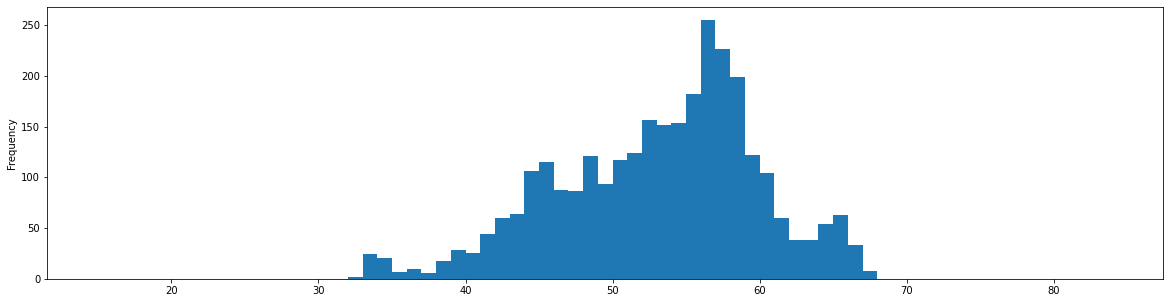

In [31]:
applier(male_collection, male_collection_age, my_male)

array([56., 52., 49., ..., 51., 47., 52.])

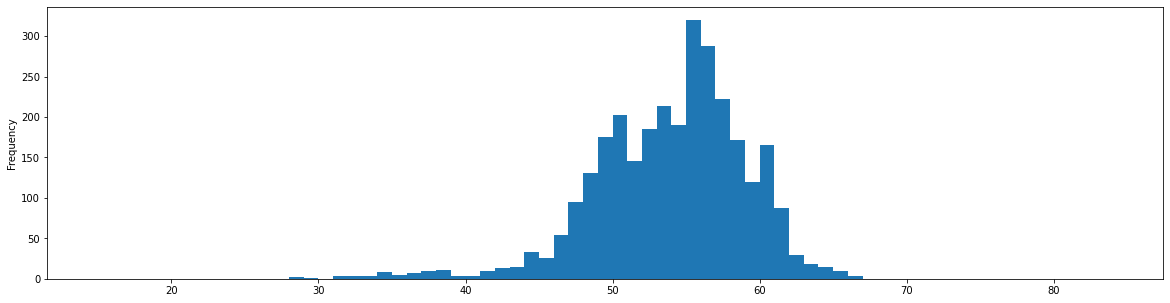

In [32]:
applier(female_collection, female_collection_age, my_female)

array([61., 54., 65., ..., 56., 60., 65.])

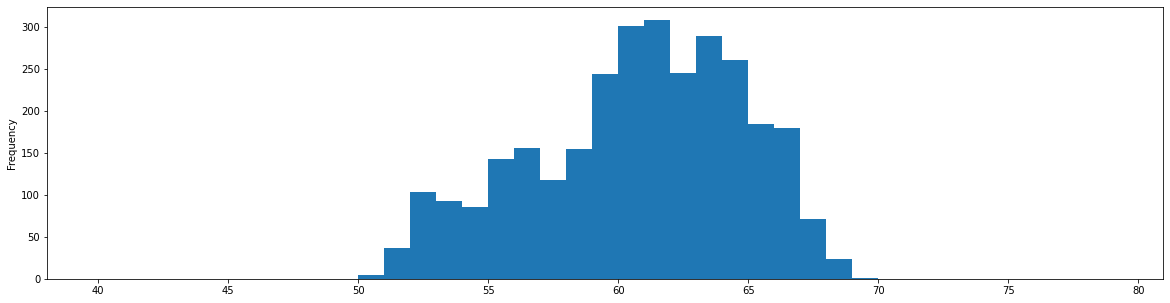

In [33]:
applier(male_collection, male_collection_age, my_male, (40,80))

array([54., 53., 54., ..., 52., 62., 51.])

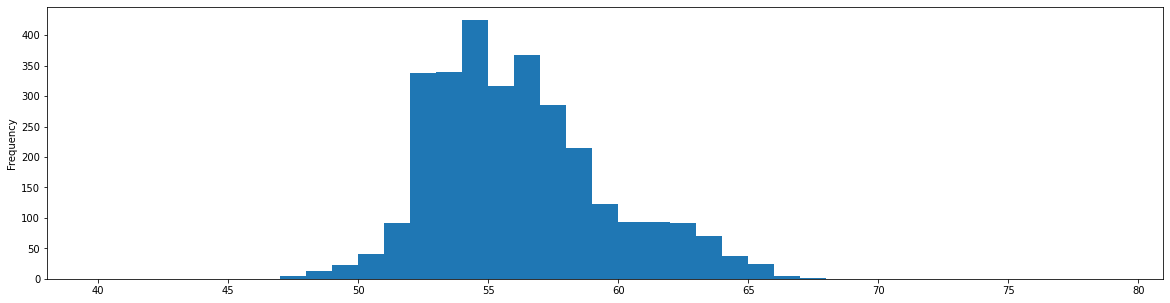

In [34]:
applier(female_collection, female_collection_age, my_female, (40,80))

## REGRESSOR APPLY WITH LIFE

array([66., 54., 65., ..., 58., 52., 63.])

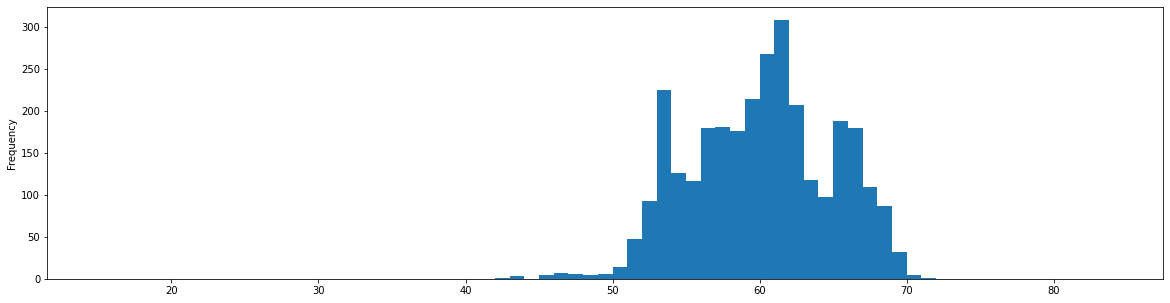

In [35]:
applier(life_male, life_male_age, my_male)

array([54., 51., 52., ..., 51., 49., 48.])

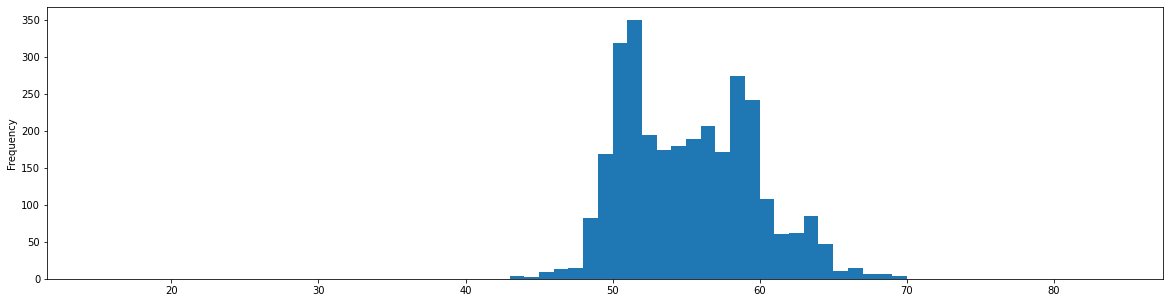

In [36]:
applier(life_female, life_female_age, my_female)


array([66., 55., 66., ..., 59., 59., 65.])

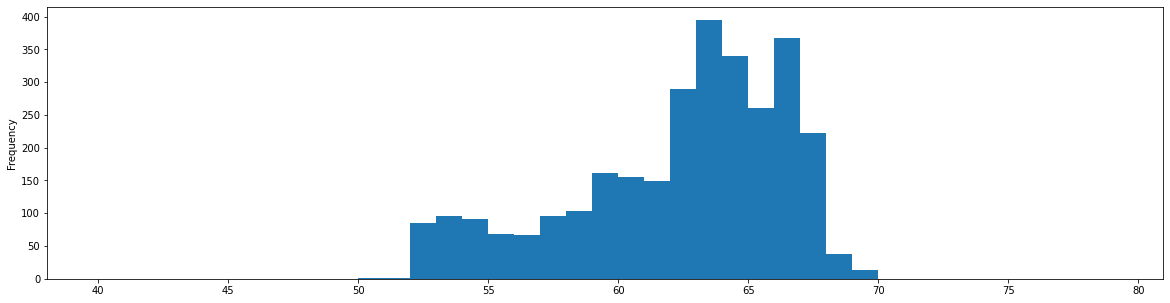

In [37]:
applier(life_male, life_male_age, my_male, (40,80))

array([55., 54., 53., ..., 53., 56., 50.])

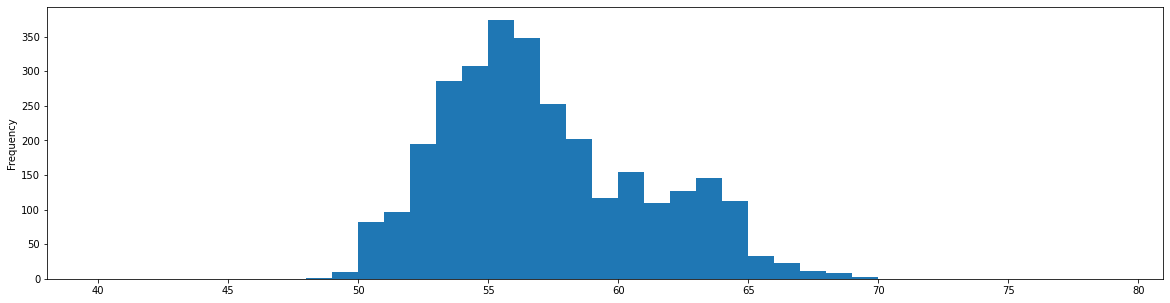

In [38]:
applier(life_female, life_female_age, my_female, (40,80))

# BODIES DIFFERENCES

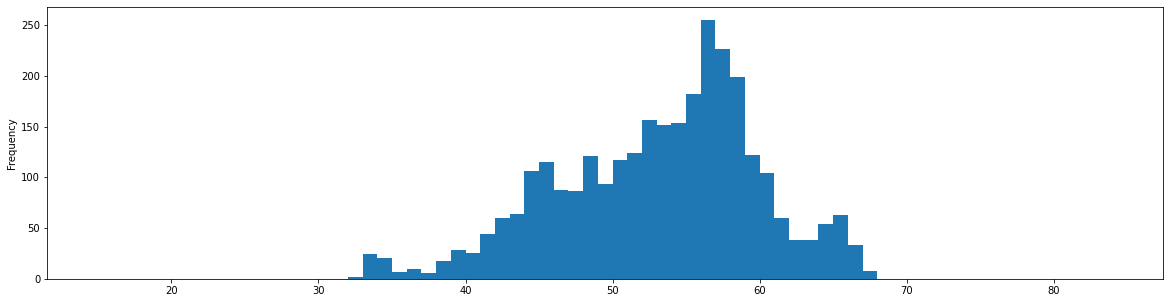

In [39]:
my_male_age = applier(male_collection, male_collection_age, my_male)

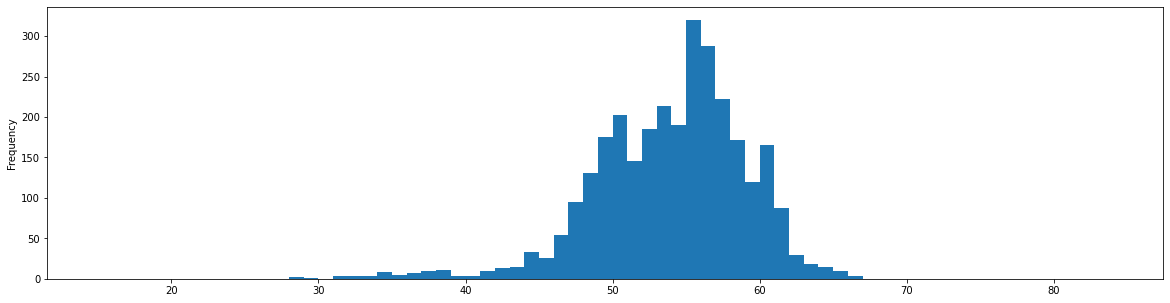

In [40]:
my_female_age = applier(female_collection, female_collection_age, my_female)

In [41]:
from scipy.spatial.distance import cdist

In [42]:
def calculate_difference(source, target, age):
    interval = (age, age)

    source_copy = source.copy()
    source_copy = source_copy[source_copy.age.between(*interval)]
    source_copy = source_copy.drop('age', axis=1)

    target_copy = target.copy()
    target_copy = target_copy[target_copy.age.between(*interval)]
    target_copy = target_copy.drop('age', axis=1)

    source_min = source_copy.min()
    source_max = source_copy.max()

    source_copy = (source_copy - source_min) / (source_max - source_min)
    target_copy = (target_copy - source_min) / (source_max - source_min)

    distances = cdist(target_copy, source_copy, 'euclidean')

    minimals = np.argmin(distances, axis=1)
    errors = distances.transpose()[minimals].diagonal()
    return errors

In [45]:
my_male_copy = my_male.copy()
my_male_copy['age'] = my_male_age

male_collection_copy = male_collection.copy()
male_collection_copy['age'] = male_collection_age

min_age = my_male_copy.age.min()
max_age = my_male_copy.age.max()

values = []
for age in np.arange(min_age, max_age+1):
    differences=calculate_difference(male_collection_copy, my_male_copy, age)
    print(differences.min()/13*100)
# male_collection_copy

16.154867180169067
16.653763608708676
19.823211311486823
18.07456617834637
17.943477667502787
19.66960258705879
18.77814429381404
16.58595903735448
18.70256451641447
16.09888500022829
15.694789475059334
15.245599749180078
12.783638991691657
15.342977183298492
17.153752277811783
16.59581695946448
14.752711287183102
16.256236700606692
17.306311354567576
17.249421199150284
21.245859067079433
18.144317691411857
16.363337457817522
18.87513619168133
18.054586066190566
21.3096441441938
16.4233346972393
17.873468764002855
21.511080552310833
22.32381135725206
20.59049312984767
19.58689185013544
16.937154670439934
21.200276440490203
21.54547506055652
18.6927683354896
